In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score

In [18]:
df=pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
## drop id columns it has not impact on data
df.drop (['id'],axis=1,inplace=True)
df.shape

(569, 31)

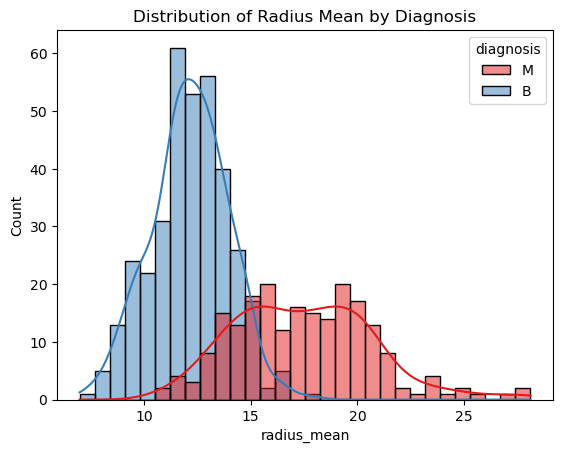

In [22]:
## EDA

sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, palette='Set1', bins=30)
plt.title('Distribution of Radius Mean by Diagnosis')
plt.show()

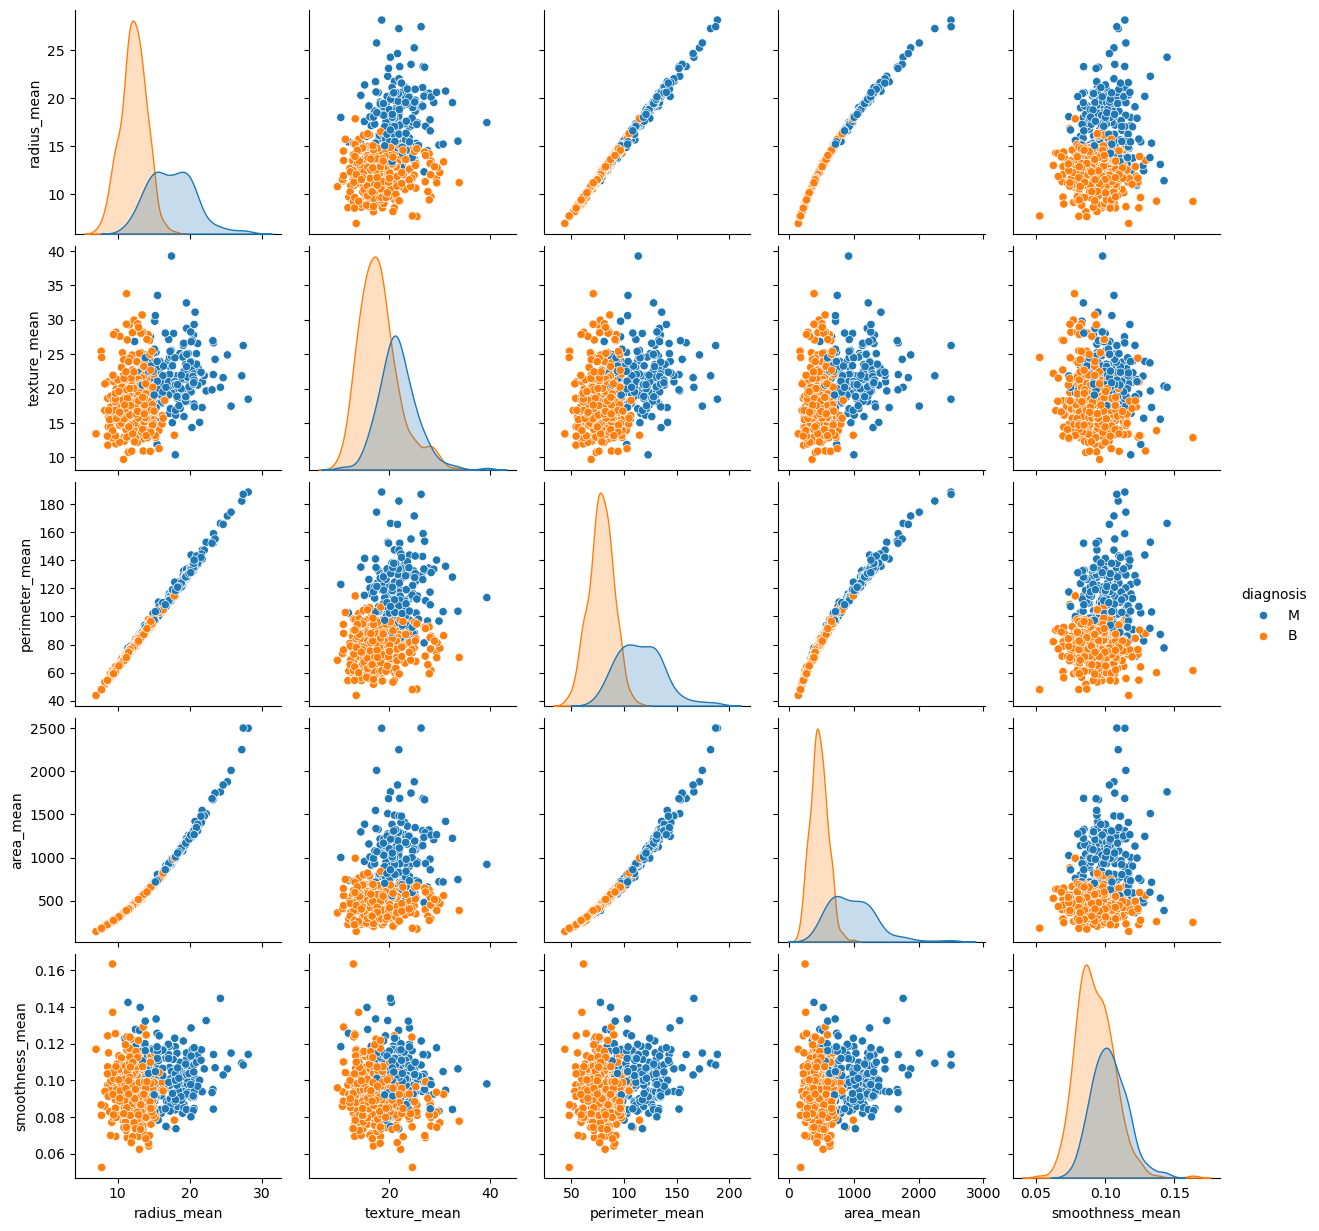

In [23]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(df[selected_features + ['diagnosis']], hue='diagnosis')
plt.show()

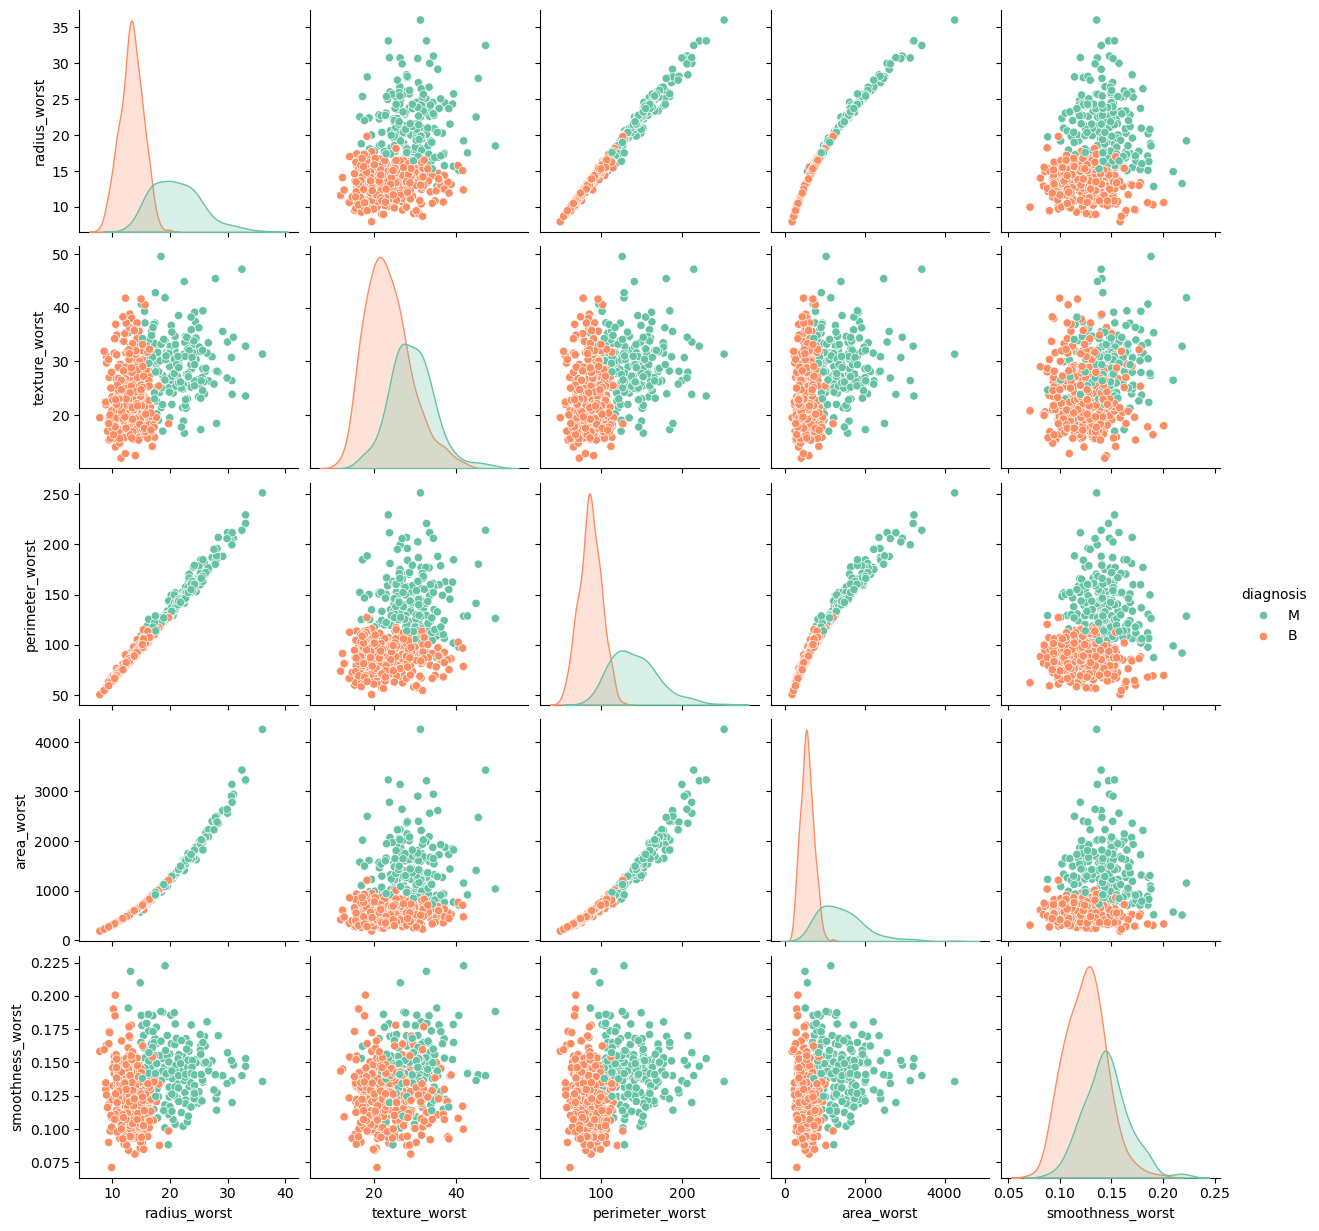

In [31]:
selected_features = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']
sns.pairplot(df[selected_features + ['diagnosis']], hue='diagnosis', palette='Set2')
plt.show()

C:\Users\anjuj\AppData\Local\Temp\ipykernel_16752\1608464304.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y='area_mean', data=df, palette='muted')


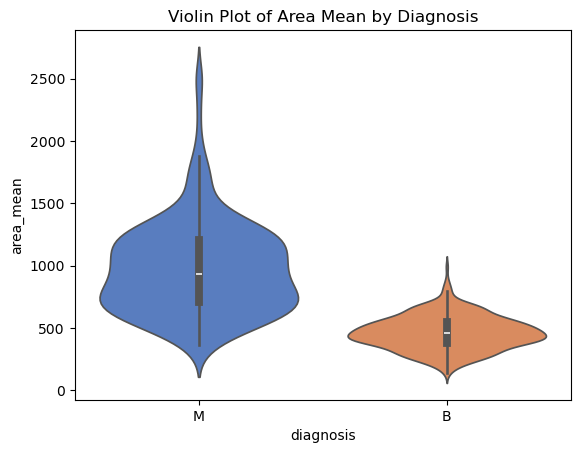

In [34]:
sns.violinplot(x='diagnosis', y='area_mean', data=df, palette='muted')
plt.title('Violin Plot of Area Mean by Diagnosis')
plt.show()

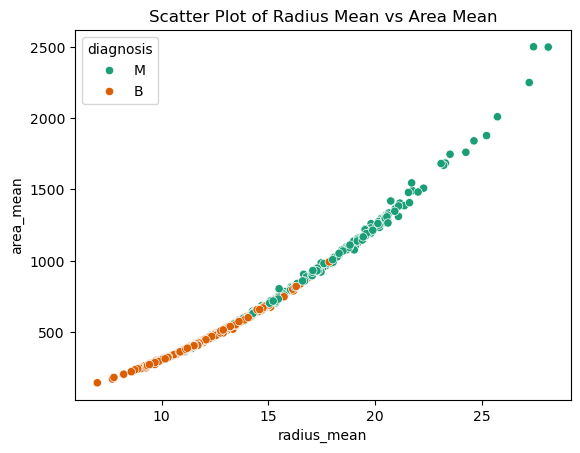

In [36]:
sns.scatterplot(data=df, x='radius_mean', y='area_mean', hue='diagnosis', palette='Dark2')
plt.title('Scatter Plot of Radius Mean vs Area Mean')
plt.show()

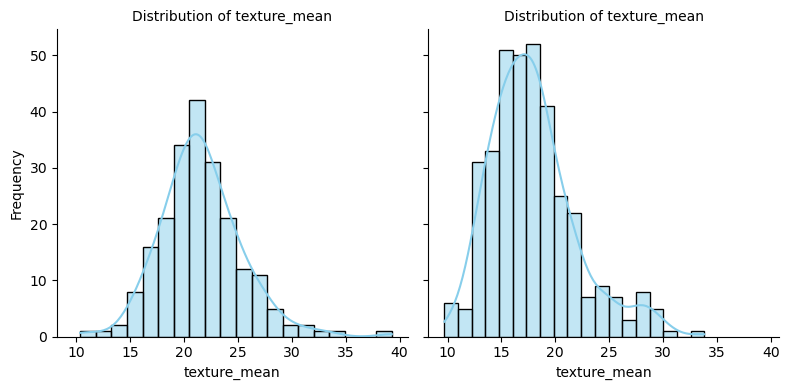

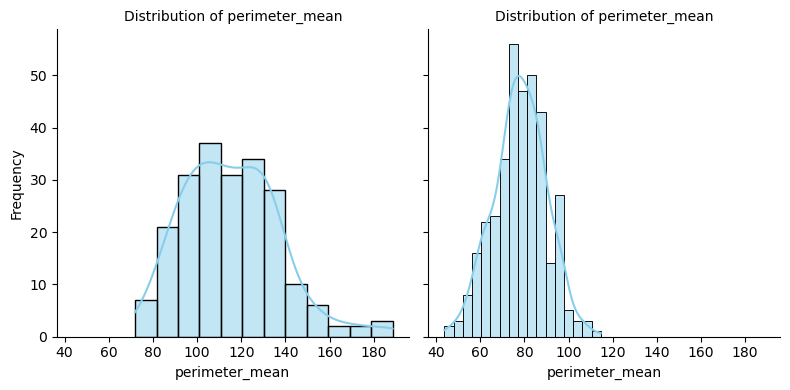

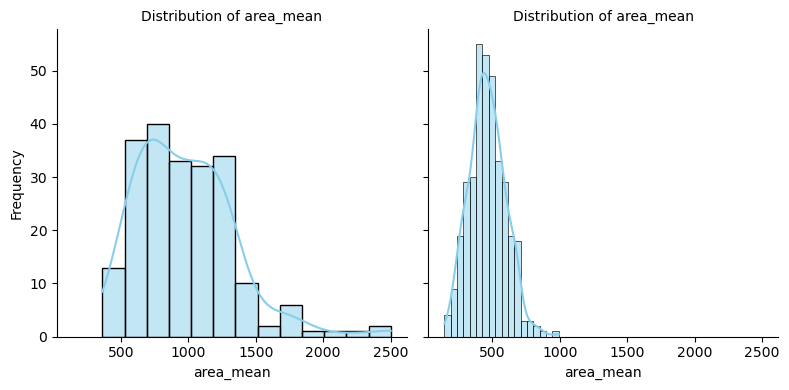

In [38]:
from seaborn import FacetGrid
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['texture_mean', 'perimeter_mean', 'area_mean']

# Create FacetGrid for each feature
for feature in features:
    g = sns.FacetGrid(df, col='diagnosis', height=4, aspect=1)
    g.map(sns.histplot, feature, kde=True, color='skyblue')
    g.set_axis_labels(feature, 'Frequency')
    g.set_titles(f'Distribution of {feature}')
    plt.show()

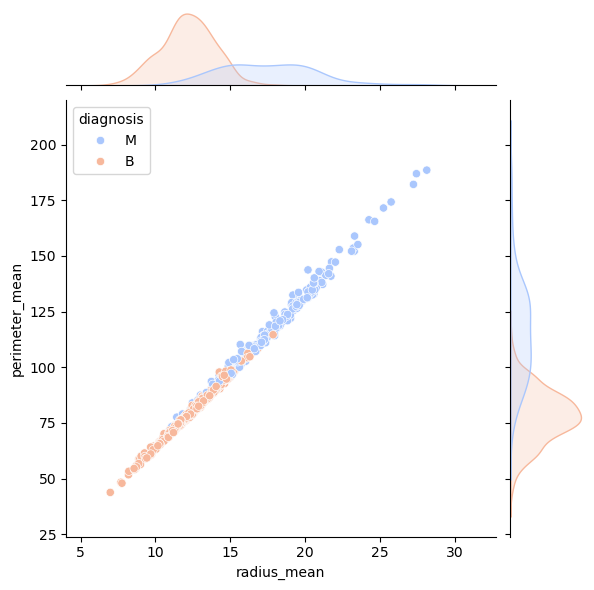

In [40]:
sns.jointplot(data=df, x='radius_mean', y='perimeter_mean', hue='diagnosis', kind='scatter', palette='coolwarm')
plt.show()

In [ ]:
## understand correlationship between numerical features

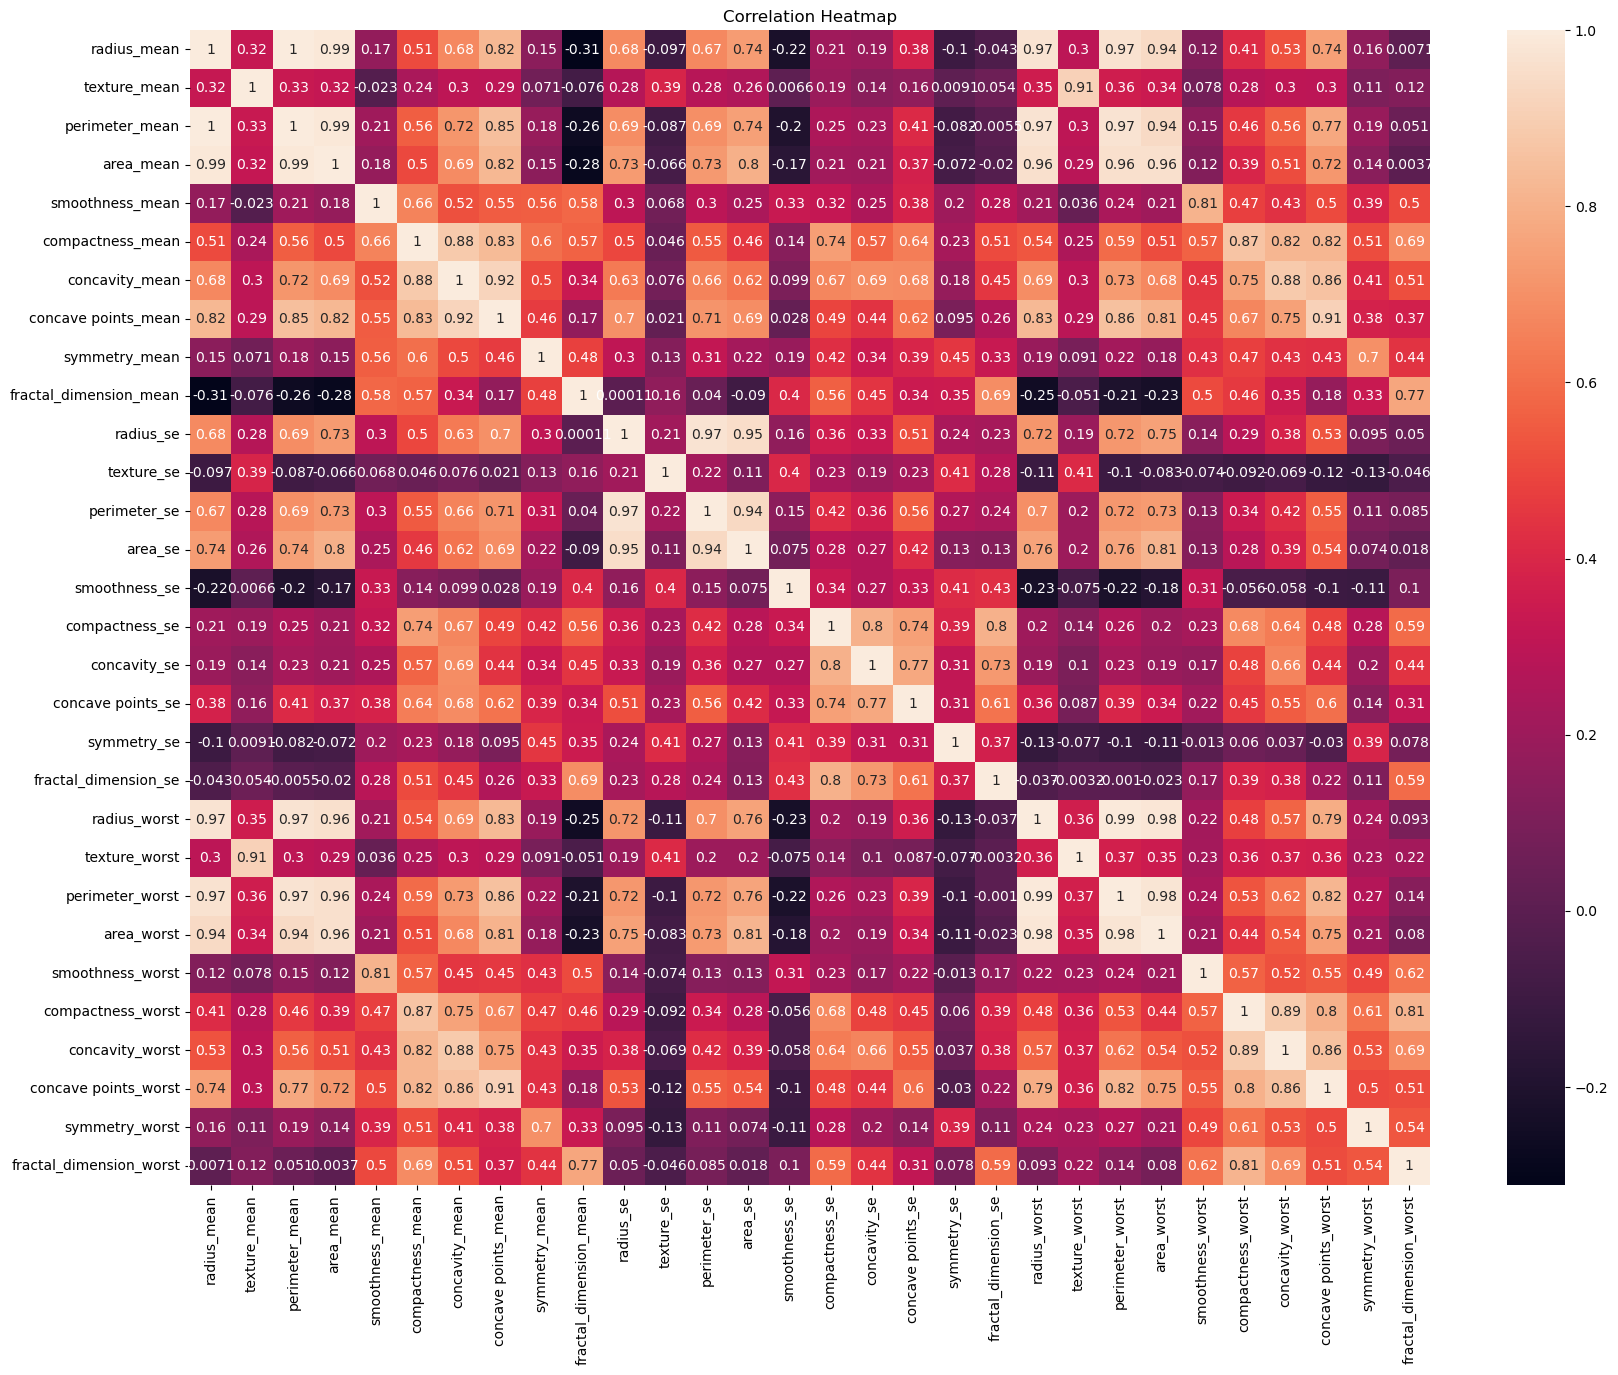

In [42]:
import numpy as np
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlations
corr = numerical_df.corr()  # Exclude non-numerical columns
plt.figure(figsize=(20, 15))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [44]:
## print high correltion between each 2 features

In [46]:
numerical_df = df.select_dtypes(include=[np.number])
corr = numerical_df.corr()

# Convert correlation matrix to a readable format
corr_pairs = corr.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])
corr = corr_pairs.sort_values(by='Correlation', ascending=False)
corr

,Feature 1,Feature 2,Correlation
2,radius_mean,perimeter_mean,0.997855
622,radius_worst,perimeter_worst,0.993708
3,radius_mean,area_mean,0.987357
63,perimeter_mean,area_mean,0.986507
623,radius_worst,area_worst,0.984015
...,...,...,...
293,fractal_dimension_mean,area_worst,-0.231854
290,fractal_dimension_mean,radius_worst,-0.253691
69,perimeter_mean,fractal_dimension_mean,-0.261477
99,area_mean,fractal_dimension_mean,-0.283110


1 radius_mean and perimeter_mean (0.997855): These two features are almost perfectly correlated.2 
radius_worst and perimeter_worst (0.993708) Similarly, the "worst" versions of these features are strongly correlated.3 
radius_mean and area_mean (0.987357): Larger radii are strongly associated with larger areas4 .
There is also strong correlation between redius_worst and area_wor5 st
There is also strong correlation between redius_se, area_se and perimeter_se
Since features like radius_mean, perimeter_mean and area_mean are almost identical, you might drop one of them to avoid redundancy during model training.

Drop perimeter_mean and area mean

In [50]:
df.drop(['perimeter_mean','area_mean'],axis=1,inplace=True)
df.shape

(569, 29)

In [52]:
## Drop perimeter_worst and area_worst
df.drop(['perimeter_worst','area_worst'],axis=1,inplace=True)
df.shape

(569, 27)

In [54]:
## Drop perimeter_se and area_se
df.drop(['perimeter_se','area_se'],axis=1,inplace=True)
df.shape

(569, 25)

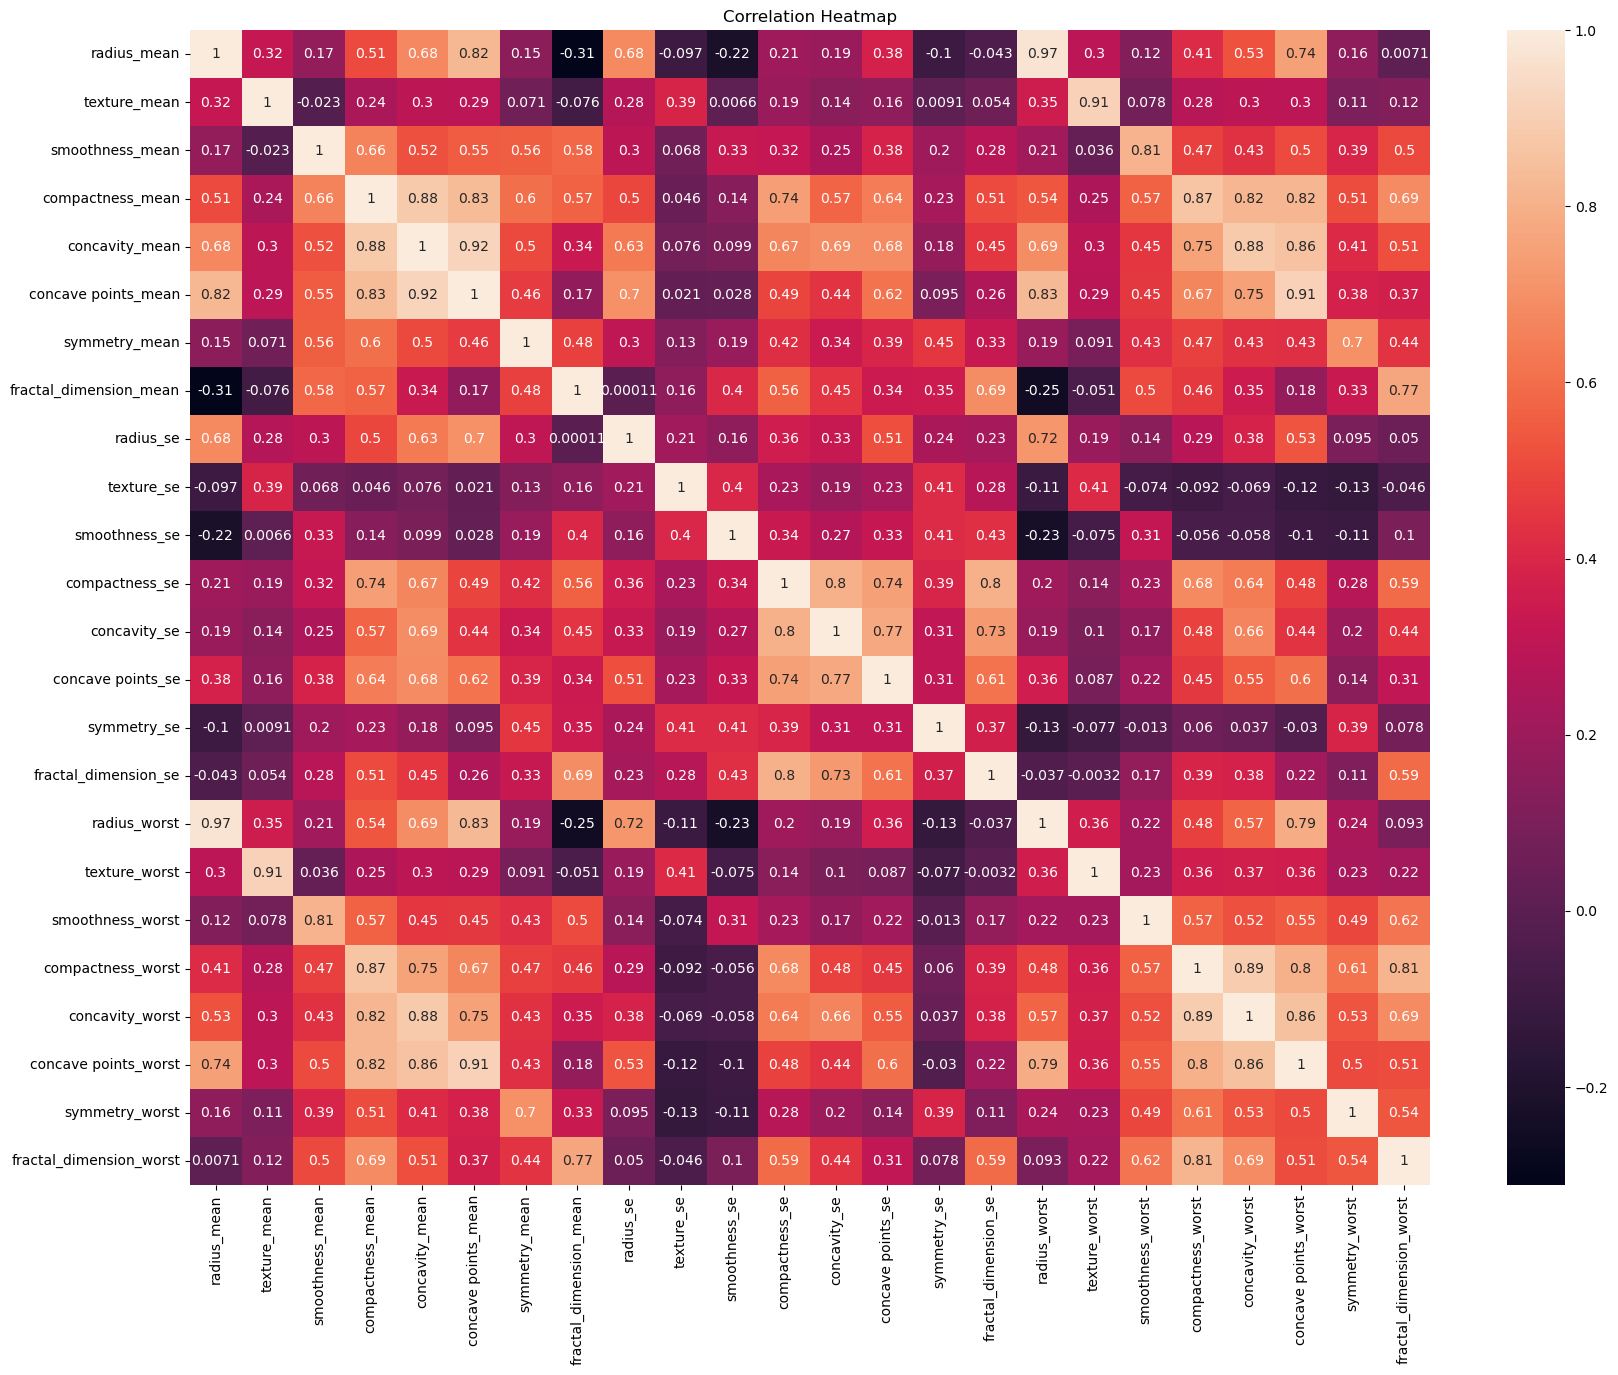

In [56]:
import numpy as np
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlations
corr = numerical_df.corr()  # Exclude non-numerical columns
plt.figure(figsize=(20, 15))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [58]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [60]:
print(corr['radius_mean']['radius_worst'])
print(corr['texture_mean']['texture_worst'])
print(corr['smoothness_mean']['smoothness_worst'])
print(corr['compactness_mean']['compactness_worst'])
print(corr['concavity_mean']['concavity_worst'])
print(corr['concave points_mean']['concave points_worst'])
print(corr['symmetry_mean']['symmetry_worst'])

0.9695389726112055
0.912044588840421
0.8053241954943627
0.8658090398022629
0.8841026390943817
0.9101553142985918
0.6998257976437302


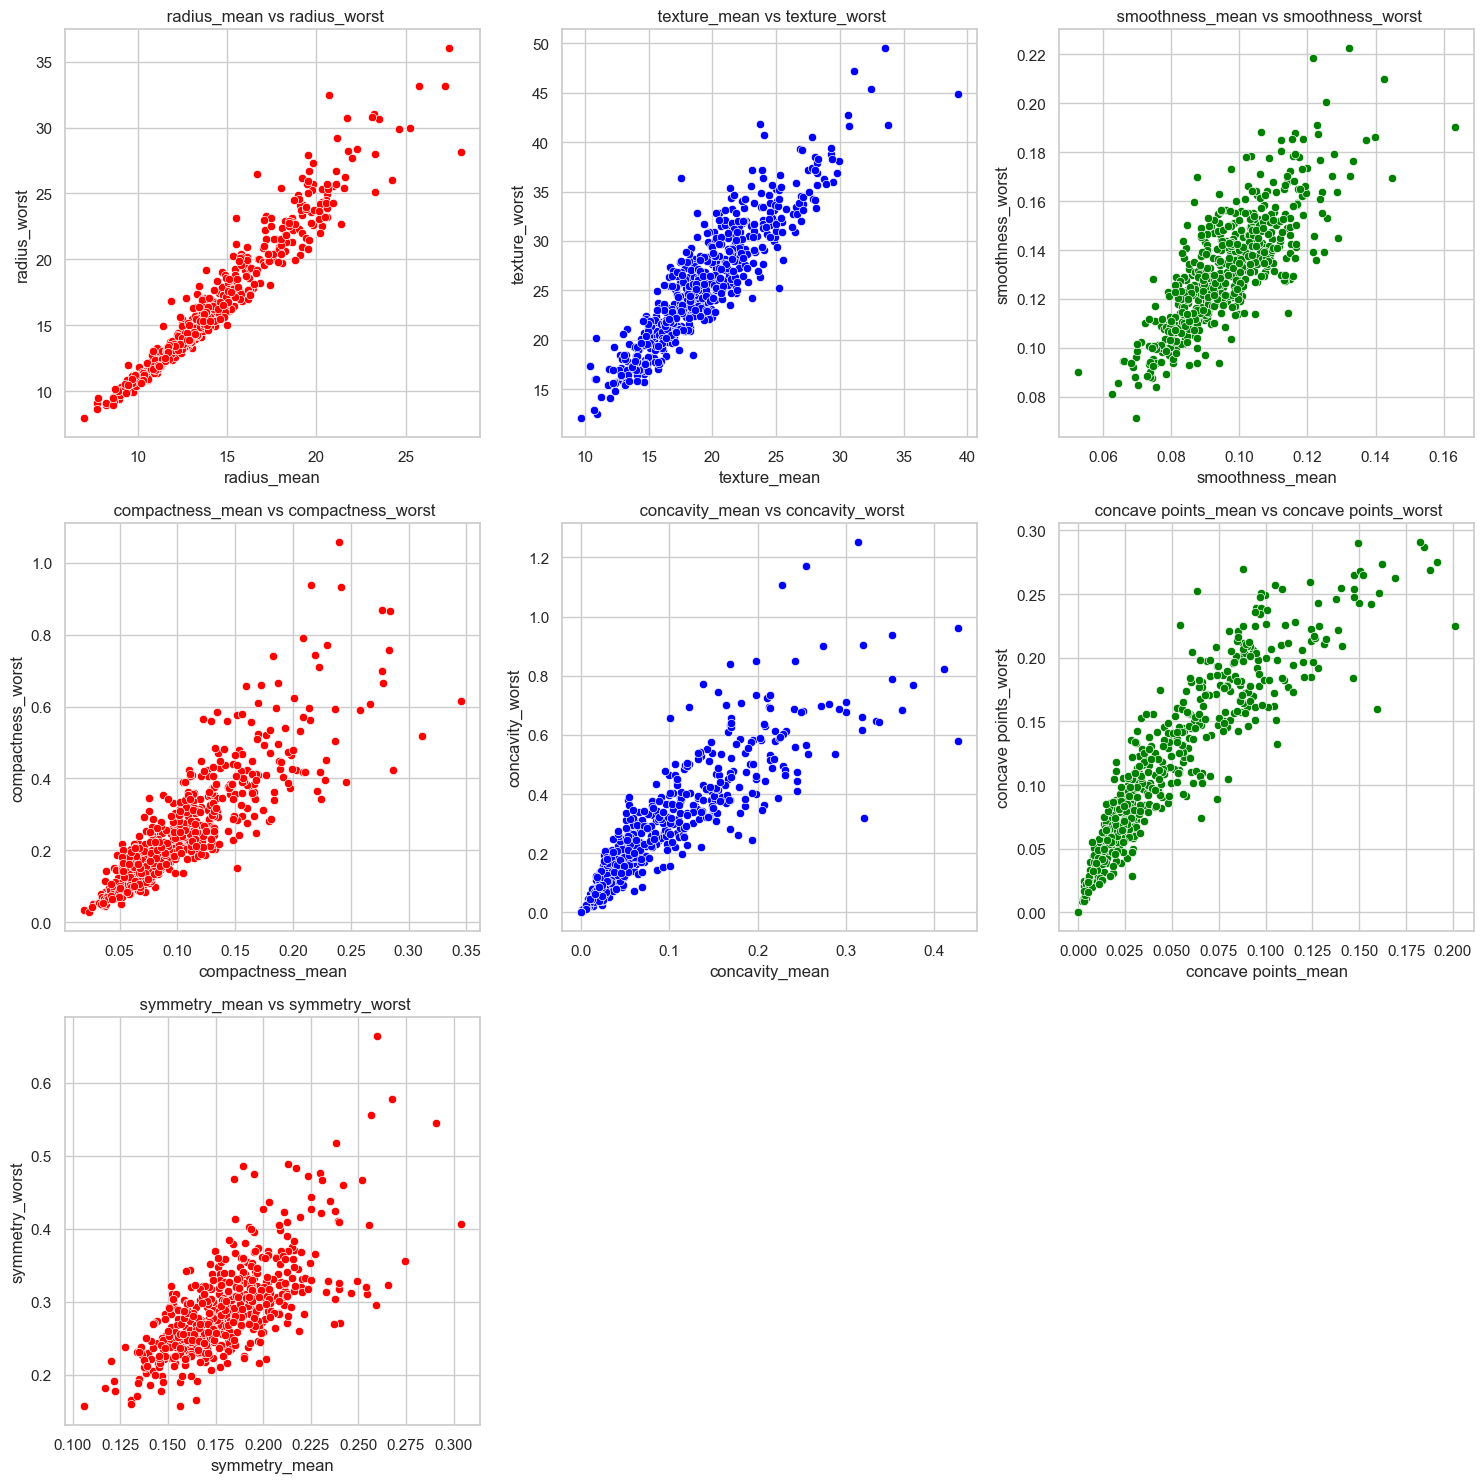

In [62]:
## Plot the relationship between each mean and worst
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# List of features for scatter plots
features = [
    ('radius_mean', 'radius_worst'),
    ('texture_mean', 'texture_worst'),
    ('smoothness_mean', 'smoothness_worst'),
    ('compactness_mean', 'compactness_worst'),
    ('concavity_mean', 'concavity_worst'),
    ('concave points_mean', 'concave points_worst'),
    ('symmetry_mean', 'symmetry_worst'),
]
colors = ['red', 'blue', 'green']

for i, (x_feature, y_feature) in enumerate(features):
    row, col = divmod(i, 3)
    sns.scatterplot(
        x=x_feature, 
        y=y_feature, 
        data=df, 
        ax=axes[row, col], 
        color=colors[i % len(colors)]  # Cycle through colors
    )
    axes[row, col].set_title(f' {x_feature} vs {y_feature}')
    axes[row, col].set_xlabel(x_feature)
    axes[row, col].set_ylabel(y_feature)

# Hide unused subplot (if any)
if len(features) < 9:
    for i in range(len(features), 9):
        row, col = divmod(i, 3)
        axes[row, col].axis('off')
plt.tight_layout()
plt.show()

In [64]:
df.drop(['radius_worst','concave points_mean','texture_worst','smoothness_worst','concavity_worst','compactness_mean'],axis=1,inplace=True)
df.shape

(569, 19)

In [66]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

C:\Users\anjuj\AppData\Local\Temp\ipykernel_16752\4124288035.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


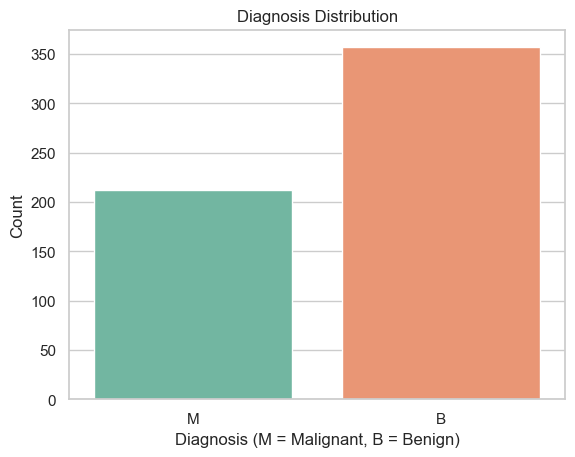

In [68]:
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()

## Encoding Categorical Data

In [71]:
df['diagnosis']=df['diagnosis'].map({'M': 0, 'B': 1}) 
df['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [73]:
x =df.drop(columns=['diagnosis'])  
y=df['diagnosis']

In [79]:
## Balanced data

In [75]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
x,y = resampler.fit_resample(x,y)

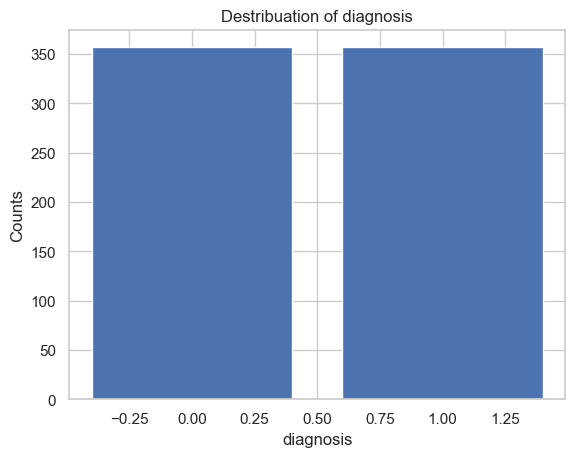

In [77]:
counts=y.value_counts()
plt.bar(counts.index,counts.values)
plt.title('Destribuation of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Counts')
plt.show()

## Scailng our data

In [82]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

X_scaled = sc.fit_transform(x)

## spliting Data

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(571, 18)
(571,)
(143, 18)
(143,)


## Evaultion

In [92]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

In [94]:
final_res =[]

## Modeling
  ## Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

# Train the model
LR.fit(X_train, y_train)

LogisticRegression()

In [99]:
# Make predictions
y_pred_LR = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LR)
final_res.append(accuracy)

In [101]:
evaluate_model(y_test,y_pred_LR)

Accuracy: 0.972027972027972
Precision: 0.9710144927536232
Recall: 0.9710144927536232
ROC AUC: 0.971993732863298


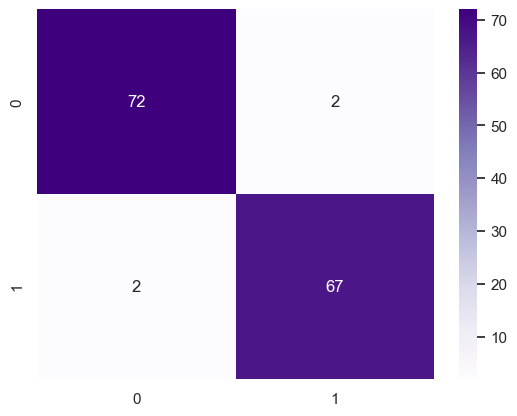

In [103]:
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.show()

## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [107]:
# Make predictions
y_pred_RF = RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_RF)
final_res.append(accuracy)

In [109]:
evaluate_model(y_test,y_pred_RF)

Accuracy: 0.9370629370629371
Precision: 0.9411764705882353
Recall: 0.927536231884058
ROC AUC: 0.936741088915002


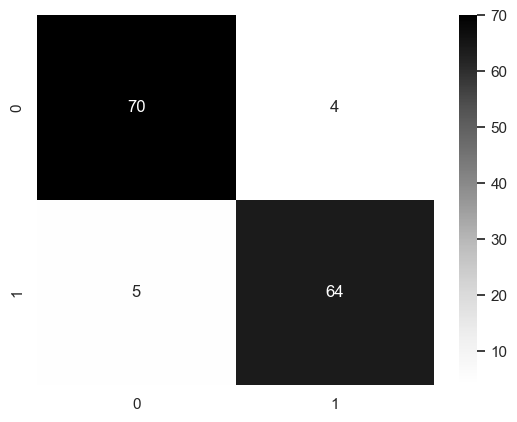

In [112]:
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")
plt.show()

## Support Vector Machine

In [114]:
from sklearn.svm import SVC
svm= SVC(random_state=42)

svm.fit(X_train, y_train)

SVC(random_state=42)

In [116]:
y_pred_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
final_res.append(accuracy)

In [118]:
evaluate_model(y_test,y_pred_svm)

Accuracy: 0.972027972027972
Precision: 0.9850746268656716
Recall: 0.9565217391304348
ROC AUC: 0.9715041128084607


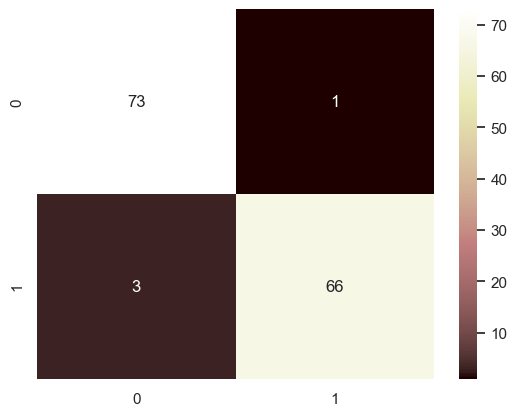

In [120]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="pink")
plt.show()

## Navie Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

GaussianNB()

In [128]:
y_pred_naive_bayes = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_naive_bayes)
final_res.append(accuracy)

In [130]:
evaluate_model(y_test,y_pred_naive_bayes)

Accuracy: 0.9440559440559441
Precision: 0.9295774647887324
Recall: 0.9565217391304348
ROC AUC: 0.9444770857814336


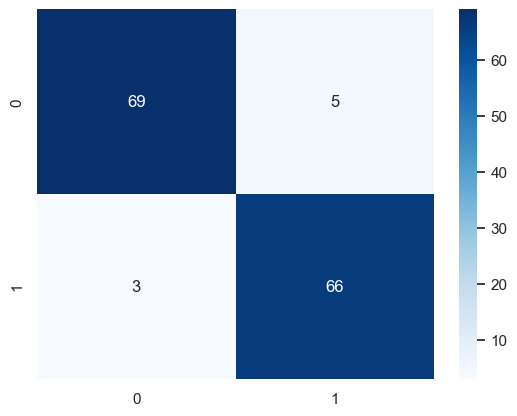

In [134]:
cm = confusion_matrix(y_test, y_pred_naive_bayes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()


## Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier(random_state=42)
ds.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [140]:
y_pred_ds = ds.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_ds)
final_res.append(accuracy)

In [142]:
evaluate_model(y_test,y_pred_ds)

Accuracy: 0.9370629370629371
Precision: 0.9545454545454546
Recall: 0.9130434782608695
ROC AUC: 0.9362514688601645


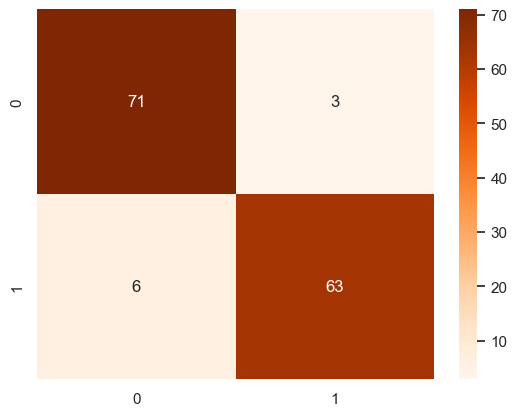

In [144]:
cm = confusion_matrix(y_test, y_pred_ds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.show()

In [146]:
final=np.array(final_res)
result=final.reshape(5,1)
columns=['Accuracy']
index=['Logistic Regression','Random Forest','SVM','Naive Bayes' ,'Decision Tree']
final_result=pd.DataFrame(result,index=index,columns=columns)

In [148]:
final_result

,Accuracy
Logistic Regression,0.972028
Random Forest,0.937063
SVM,0.972028
Naive Bayes,0.944056
Decision Tree,0.937063


 ## Conclusion:

Logistic Regression and SVM would be the go-to models if you're aiming for the best performance based on accuracy. 
Other models like Random Forest, Naive Bayes, and Decision Tree can still provide good predictions and may be useful for comparison or in situations where interpretability or speed is important.